In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from nn import NeuralNetwork
from hedger import Hedger
from instruments import BrownianStock, EuropeanOption, LookbackOption
from finance import pl

tensor(0.0065, grad_fn=<NegBackward0>)
tensor(0.0006, grad_fn=<NegBackward0>)
tensor(0.0008, grad_fn=<NegBackward0>)
tensor(4.8306e-05, grad_fn=<NegBackward0>)
tensor(5.1579e-05, grad_fn=<NegBackward0>)
tensor(6.4608e-05, grad_fn=<NegBackward0>)
tensor(-3.4560e-05, grad_fn=<NegBackward0>)
tensor(-0.0002, grad_fn=<NegBackward0>)
tensor(-0.0002, grad_fn=<NegBackward0>)
tensor(-0.0003, grad_fn=<NegBackward0>)


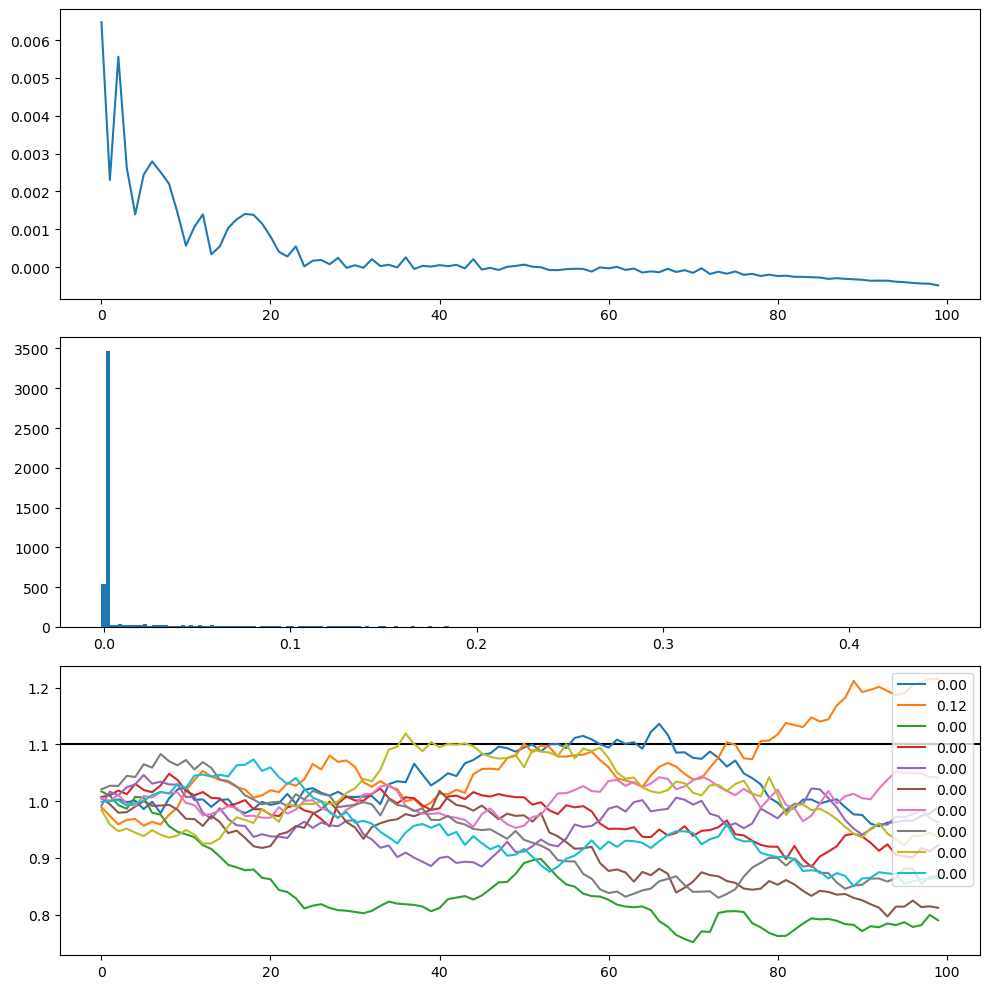

In [5]:
# Training params
n_paths = 5000
n_epochs = 100

# Network params
n_features = 3
n_outputs = 1

# Instrument params
mu = 0.0
sigma = 0.2
features = ['time',
            'log_moneyness',
            'volatility']

# Derivative params
call = True
short = False
strike = 1.1
maturity = 100/250

model = NeuralNetwork(n_features, n_outputs)
underlier = BrownianStock(mu, sigma)
derivative = EuropeanOption(underlier, call=call, short=short, strike=strike, maturity=maturity)
hedger = Hedger(model, underlier, derivative)
history = hedger.fit(features=features, n_epochs=n_epochs, n_paths=n_paths)
results = hedger.test(features=features, n_paths=n_paths)
stocks = underlier.spot
payoffs = derivative.payoff

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
ax1.set_label('Loss Function')
ax2.set_label('P&L')
ax1.plot(history)
ax2.hist(results, bins=200)
ax3.set_label('Stock Paths')
ax3.axhline(c='k', y=strike)
for (stock, payoff) in zip(stocks[:10], payoffs[:10]):
    ax3.plot(stock, label=f'{payoff:.2f}')
ax3.legend()
plt.tight_layout()
plt.show()

tensor(0.3080, grad_fn=<NegBackward0>)
tensor(0.1935, grad_fn=<NegBackward0>)
tensor(0.1914, grad_fn=<NegBackward0>)
tensor(0.1842, grad_fn=<NegBackward0>)
tensor(0.1748, grad_fn=<NegBackward0>)
tensor(0.1749, grad_fn=<NegBackward0>)
tensor(0.1589, grad_fn=<NegBackward0>)
tensor(0.1485, grad_fn=<NegBackward0>)
tensor(0.1460, grad_fn=<NegBackward0>)
tensor(0.1496, grad_fn=<NegBackward0>)


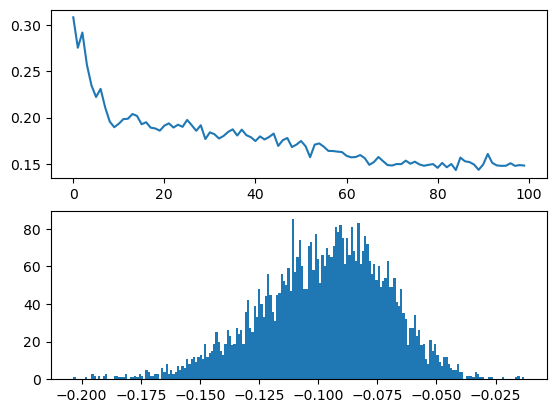

In [2]:
n_paths = 500
n_epochs = 100
n_features = 2

model = NeuralNetwork(n_features, 1)
underlier = BrownianStock(mu=0.0, sigma=0.2)
derivative = LookbackOption(underlier, short=True, call=True, strike=1.0, maturity=100/250)
hedger = Hedger(model, underlier, derivative)
history = hedger.fit(n_epochs=n_epochs, n_paths=n_paths)
results = hedger.test(n_paths=5000)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(history)
ax2.hist(results, bins=200)
plt.show()